<a href="https://colab.research.google.com/github/anantagr/Advance-House-pricing-prediction/blob/main/Advance_house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the required libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To display all columns of the pandas dataframe
pd.pandas.set_option('display.max_columns', None)

# for feature slection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

## **Mounting Google drive to access data files**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading Train.csv to Dataframe**

In [5]:
path_to_train_csv = '/content/drive/MyDrive/Colab Notebooks/Explotatory Data Analysis/Advance House pricing prediction/Data/train.csv'
df_train=pd.read_csv(path_to_train_csv)

path_to_test_csv = '/content/drive/MyDrive/Colab Notebooks/Explotatory Data Analysis/Advance House pricing prediction/Data/test.csv'
df_test=pd.read_csv(path_to_test_csv)

print('Train data shape:{}'.format(df_train.shape))
print('Test data shape:{}'.format(df_test.shape))


Train data shape:(1460, 81)
Test data shape:(1459, 80)


In [ ]:
df_train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

# **Exploratory Data Analysis**

#### In EDA, we will find out:
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


In [ ]:
def feature_comparison(df_train, df_test):
  New_feat_in_Train = [feature for feature in df_train.columns if feature not in df_test.columns]
  New_feat_in_Test = [feature for feature in df_test.columns if feature not in df_train.columns]

  print('Additional features in train data: {}'.format(New_feat_in_Train))
  print('Additional features in test data: {}'.format(New_feat_in_Test))

  return New_feat_in_Test


In [ ]:
New_feat_in_Test = feature_comparison(df_train, df_test)

Additional features in train data: ['SalePrice']
Additional features in test data: []


## **Missing Values**

### **Visualizing missing values with seaborn**

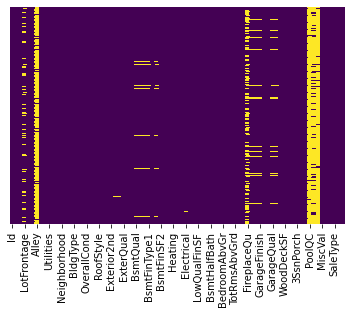

In [ ]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### **Creating a list for features with missing values**

In [ ]:
# Make a seperate list of all the features which has missing values
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]


# Print the name of the feature with missing values and %tage of missing values
for feature in features_with_na:
  print(feature, np.round(df_train[feature].isnull().mean(), 4), ' % of missing values')

LotFrontage 0.1774  % of missing values
Alley 0.9377  % of missing values
MasVnrType 0.0055  % of missing values
MasVnrArea 0.0055  % of missing values
BsmtQual 0.0253  % of missing values
BsmtCond 0.0253  % of missing values
BsmtExposure 0.026  % of missing values
BsmtFinType1 0.0253  % of missing values
BsmtFinType2 0.026  % of missing values
FireplaceQu 0.4726  % of missing values
GarageType 0.0555  % of missing values
GarageYrBlt 0.0555  % of missing values
GarageFinish 0.0555  % of missing values
GarageQual 0.0555  % of missing values
GarageCond 0.0555  % of missing values
PoolQC 0.9952  % of missing values
Fence 0.8075  % of missing values
MiscFeature 0.963  % of missing values


### **Relation between missing values and dependent feature(Sale price $$)**

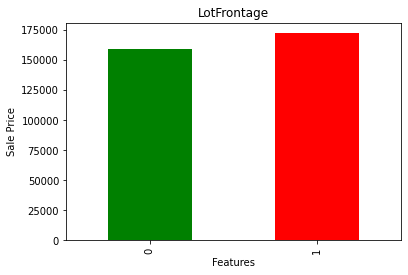

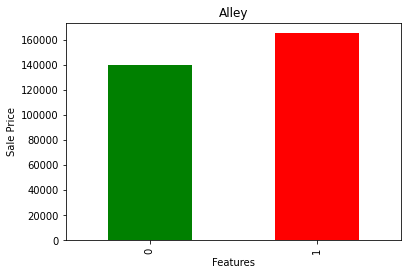

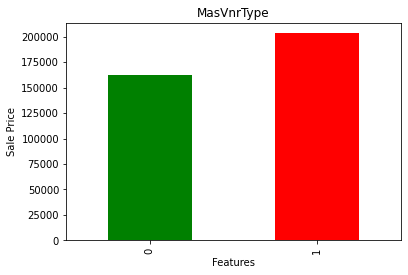

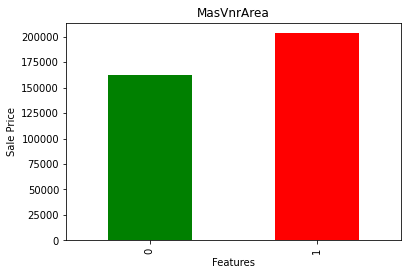

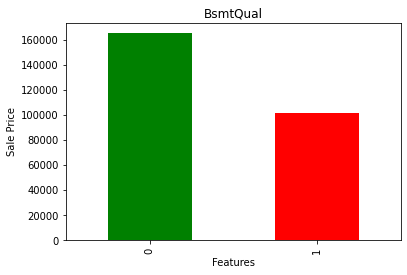

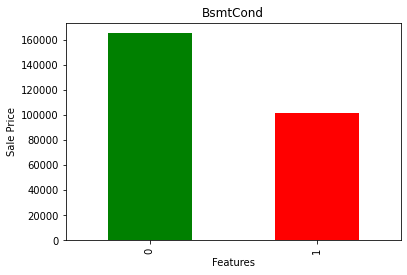

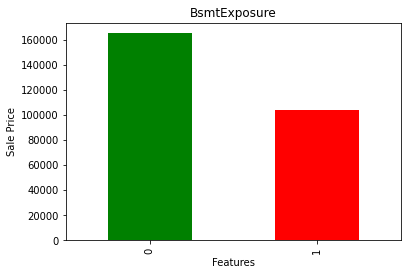

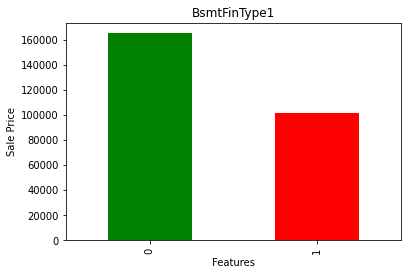

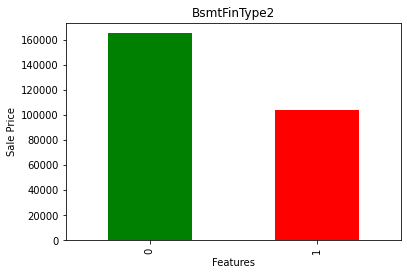

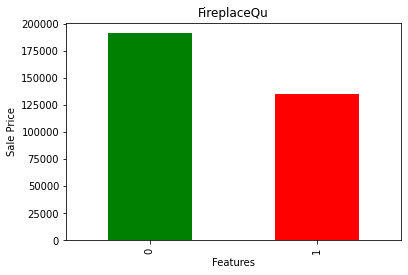

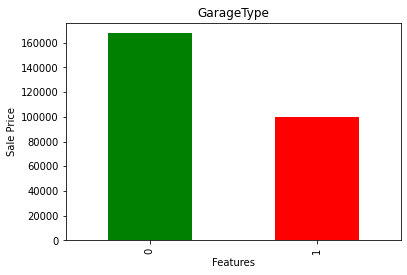

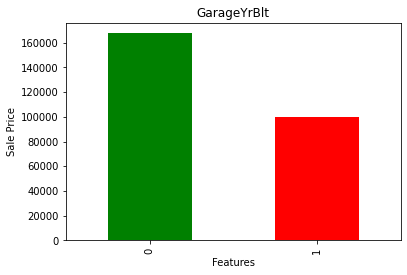

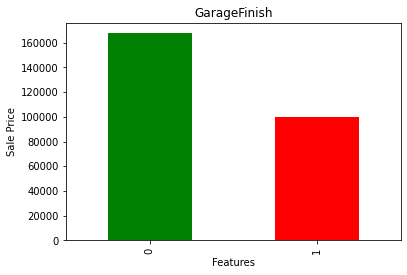

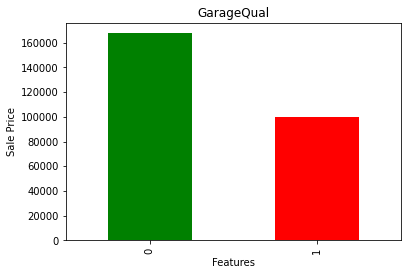

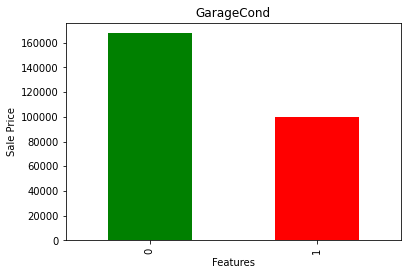

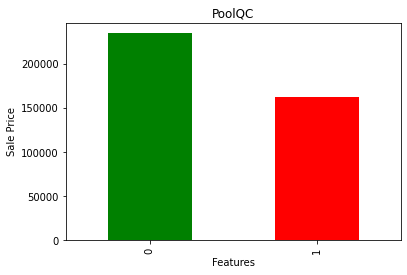

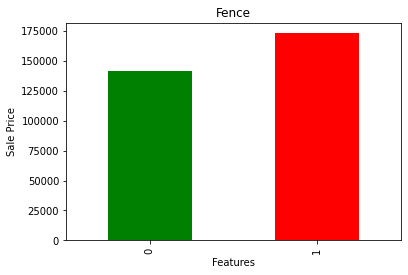

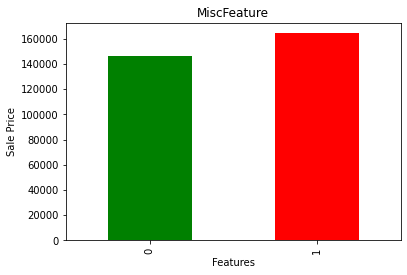

In [ ]:
for feature in features_with_na:
  data = df_train.copy()

  #Assigning 1 if the selected feature is missing a value and 0 if not
  data[feature] = np.where(data[feature].isnull(), 1, 0)

  #Plot Sale price mean price for missing values and for non-missing values
  data.groupby(feature)['SalePrice'].median().plot.bar(color = ['green', 'red',])
  plt.title(feature)
  plt.ylabel('Sale Price') 
  plt.xlabel('Features') 
  plt.show()

### **Inference**
It is evident that missing values in different features are playing an important role in determining the final sale price, so we cannot simply delete the missing value rows but instead replace them with something meaningful.

## **Dropping unnecessary column**


*   ID of homes



In [ ]:
print ("ID of homes {}".format(len(df_train.Id)))

ID of homes 1460


## **Numerical variable**

In [ ]:
#Make a seperate list for all numerical features (their datatype != objects)
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtype != 'O']

print('Number of numerical features = ', len(numerical_features))

#Show only numerical features from df_train
df_train[numerical_features].head()

Number of numerical features =  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

## **Find temporal variable (E.g. Datatime Variable)**

We will convert the year value such as year of purchase or year sold to numerical value by converting it to number of years in Feature Engineering.


In [ ]:
#Make a list of features containing Year related values
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
print('Year related features are ', year_features)

Year related features are  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


### **Finding relation between temporal variable (Year related features) with dependent variable (Sale price)**

---
Year related features are:


1.   Year built
2.   Year remodelled
3.   Year when garage was built
4.   Year house was sold




In [ ]:
 #Finding unique entries in year_features
for feature in year_features:
  print("Feature name: ", feature, '\n Unique Values: \n', df_train[feature].unique(), '\n')

Feature name:  YearBuilt 
 Unique Values: 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

Feature name:  YearRemodAdd 
 Unique Values: 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

Feature name:  GarageYrBl

Relationship between **YearBuilt** and **SalePrice**

Text(0.5, 1.0, 'House Price vs Year Built')

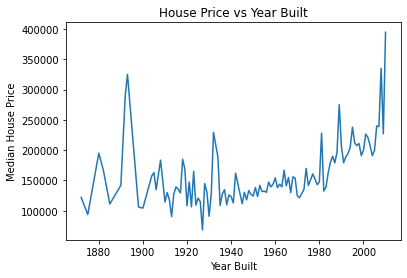

In [ ]:
df_train.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Built')

This graph shows a trend that as the years are passing by the price of the house is increasing, which is the exected trend.

* Recently built houses are higher priced




Relationship between **Year remodelled** and **SalePrice**

Text(0.5, 1.0, 'House Price vs Year Remodelled')

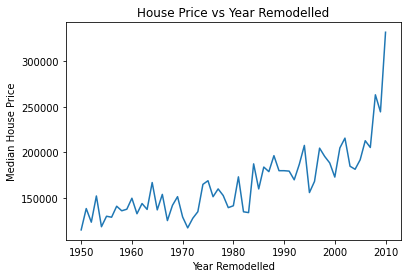

In [ ]:
df_train.groupby('YearRemodAdd')['SalePrice'].median().plot()
plt.xlabel('Year Remodelled')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Remodelled')

This graph shows a trend that as the years are passing by the price of the house is increasing, which is the exected trend.

* Recently remodelled houses are higher priced

Relationship between **Year Garage built** and **SalePrice**

Text(0.5, 1.0, 'House Price vs Year Garage Built')

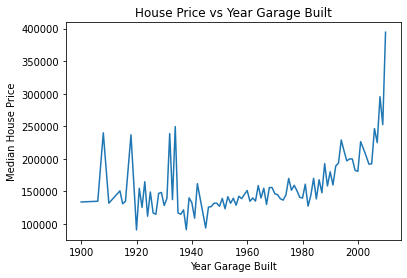

In [ ]:
df_train.groupby('GarageYrBlt')['SalePrice'].median().plot()
plt.xlabel('Year Garage Built')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Garage Built')

This graph shows a trend that as the years are passing by the price of the house is increasing, which is the exected trend.

* Houses with garages have been built recently are higher priced


Relationship between **Year Sold** and **SalePrice**

Text(0.5, 1.0, 'House Price vs Year Sold')

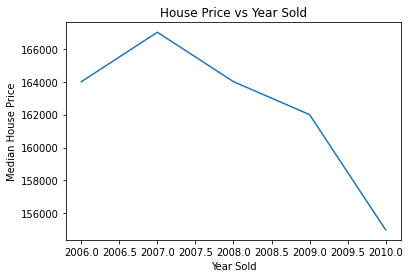

In [ ]:
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold')

In this graph, the trend seems to be broken. 
* The houses have been sold at lower prices compared to previous years.

This trend does not seem to representing true picture so we will further investigate this.

Relation between **number of years** and **Sale price** using Scatter plot

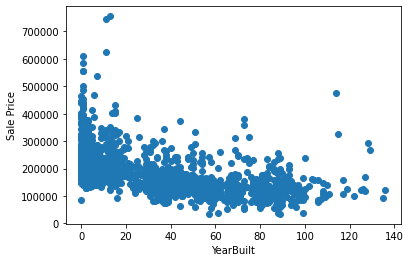

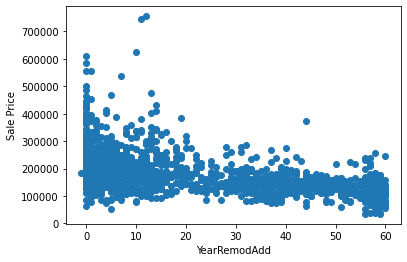

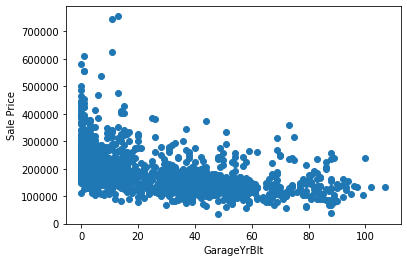

In [ ]:
for feature in year_features:
  if feature!= 'YrSold':
    data=df_train.copy()

    #Calculate the difference of years between selected feature and the year house was sold
    data[feature]=data['YrSold'] - data[feature]

    x = data[feature]
    y = data['SalePrice']

    plt.scatter(x, y)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')

    plt.show()


### **Inference**

These scatter graphs makes more sense as we can see prices for more recently built or remodelled houses or recently built garage is higher. 
We will further explore this in Feature Engineering section

## **Discrete numerical features and Continuous numerical features**



*   **Discrete Feature** - Number of unique categories in dataset is **less than 25** and should NOT be in **year_features** and NOT be **ID** feature
*   **Continuous Feature** - Number of unique categories in dataset is **more than or equal to 25**



### **Discrete Variable**

In [ ]:
 # Make a seperate list for Discrete numerical features
 discrete_features = [feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_features + ['Id']]

# print discrete features
print("Discrete feature count: {} \n".format(len(discrete_features)))

print('Discrete features are: ')
discrete_features

Discrete feature count: 17 

Discrete features are: 


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [ ]:
df_train[discrete_features].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

### **Finding relation between Discrete variable features with dependent variable (Sale price)**

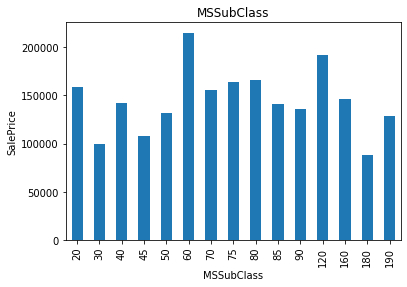

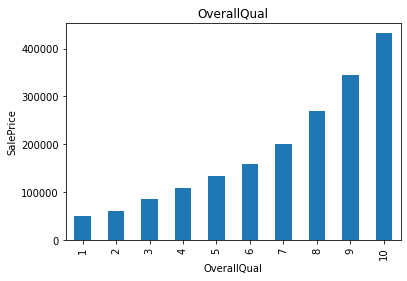

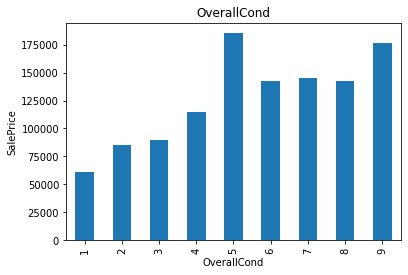

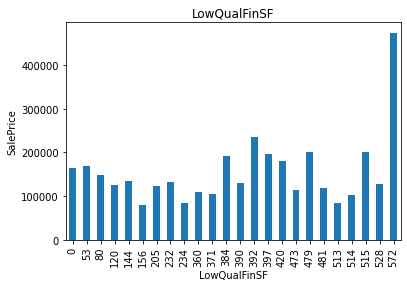

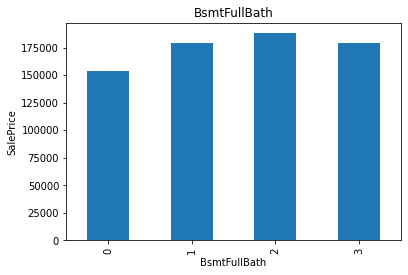

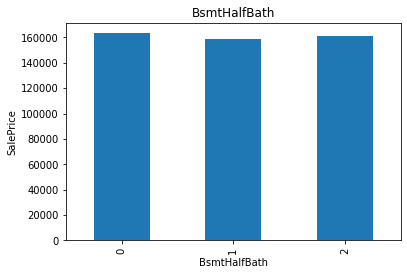

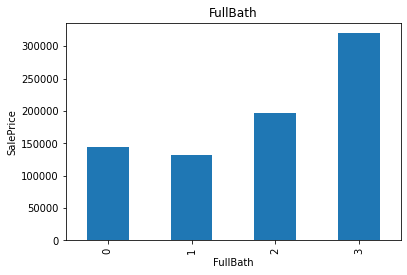

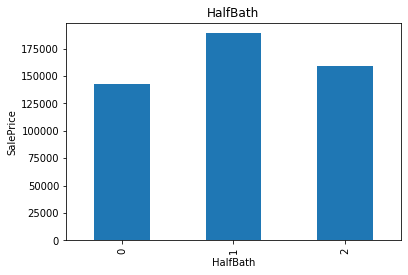

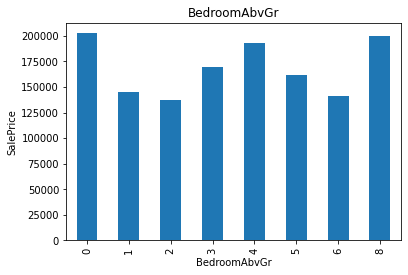

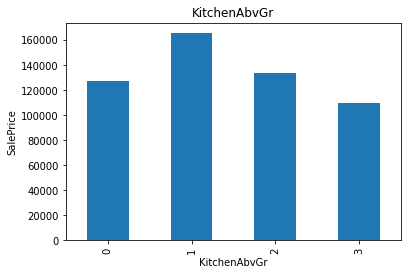

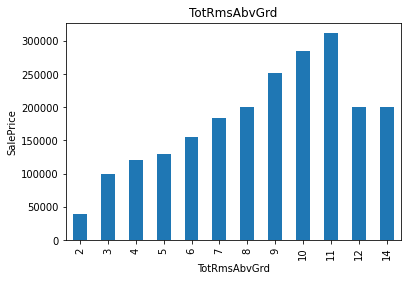

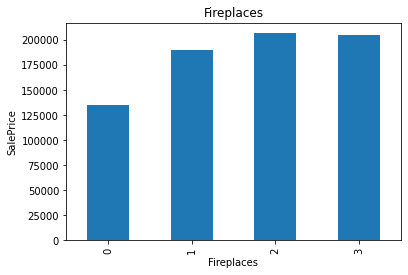

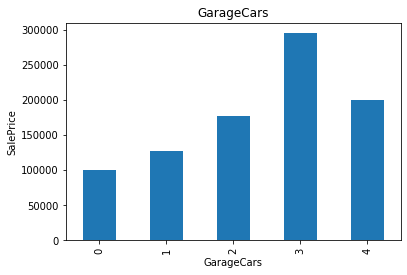

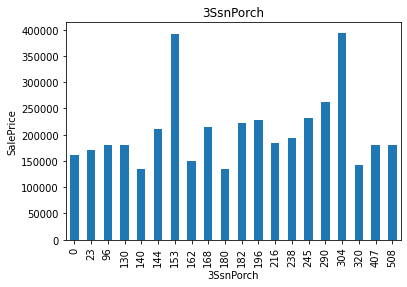

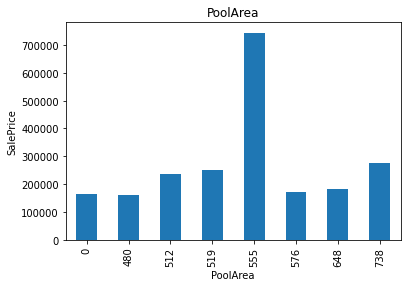

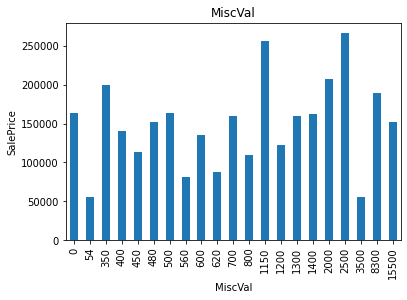

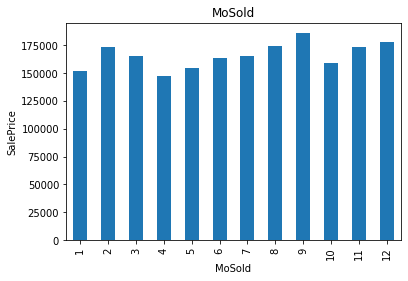

In [ ]:
for feature in discrete_features:
  data = df_train.copy()
  y = data.groupby(feature)['SalePrice'].median()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

### **Inference**

All discrete features have some relation with Sale Price.

### **Continuous Variable**

In [ ]:
 # Make a seperate list for Continuous numerical features
 continuous_features = [feature for feature in numerical_features if feature not in discrete_features + year_features + ['Id']]

# print continuous features
print("Continuous feature count: {} \n".format(len(continuous_features)))

print('Continuous features are: ')
continuous_features

Continuous feature count: 16 

Continuous features are: 


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [ ]:
df_train[continuous_features].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

### **Finding distribution of the Continuous values**

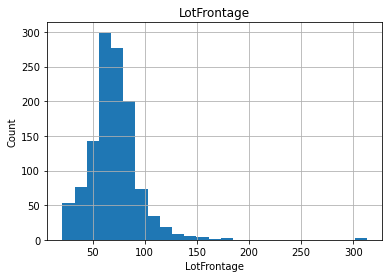

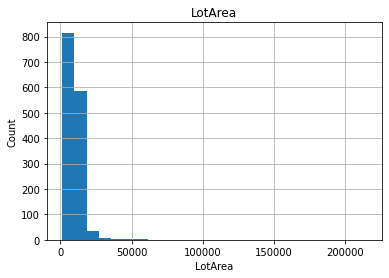

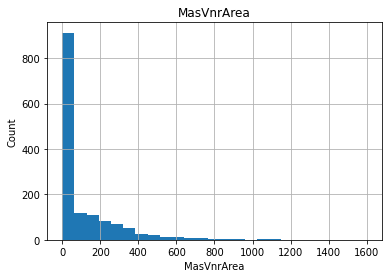

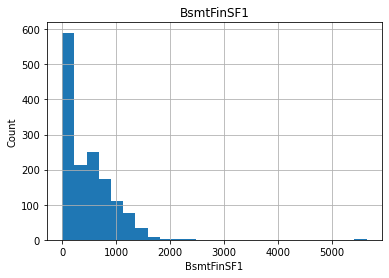

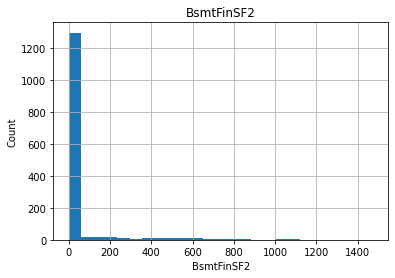

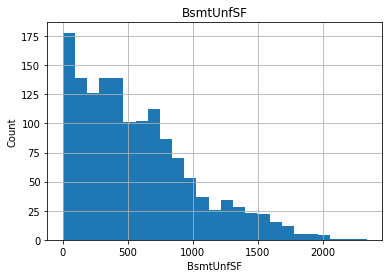

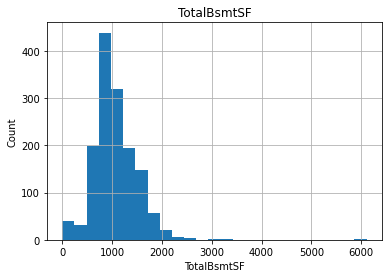

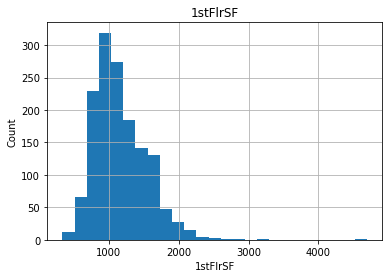

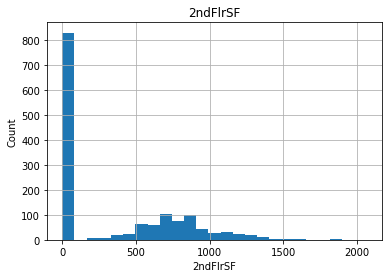

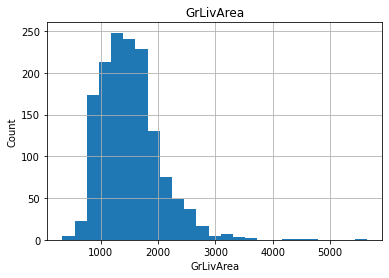

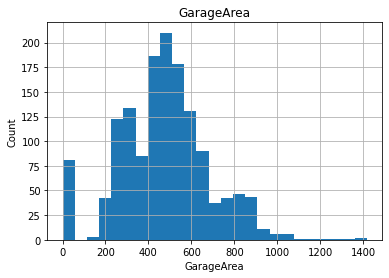

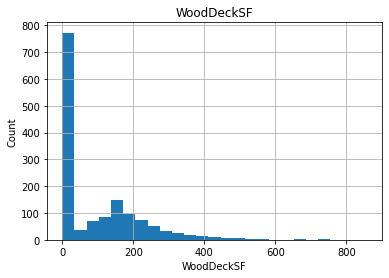

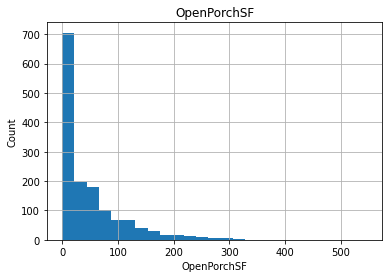

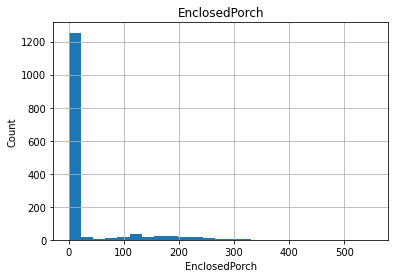

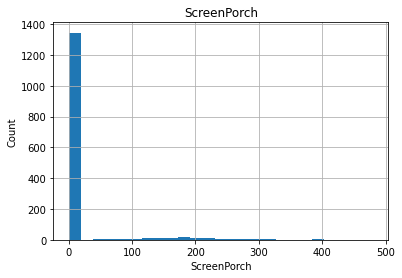

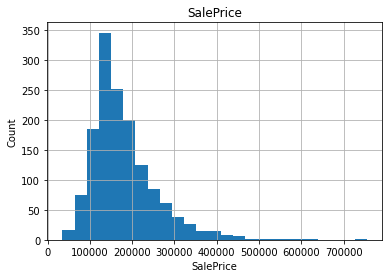

In [ ]:
# As these are continuous variable, we will use Histograms to find the relation with the Sale Price.
for feature in continuous_features:
  data=df_train.copy()
  data[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()


### **Inference**
Some of the features have Gaussian distribution but many are skewed left or right.
In Feature Engineering section, we will apply Transformation technique to achive Gaussian (Normal) distribution for these features.

## **Applying Transformations on Dataset**

As evident from last section, we will apply log normal transformation on the Numerical continuous features to make the data more normally distributed.

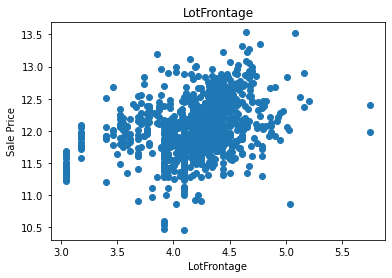

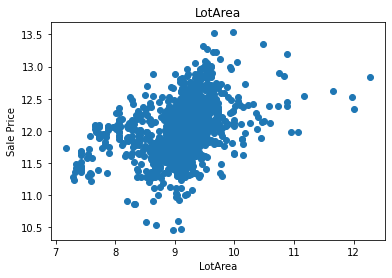

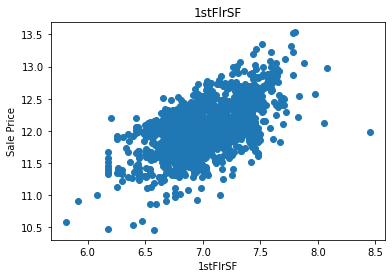

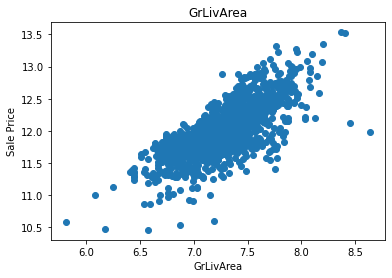

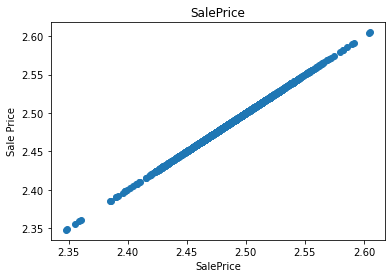

In [ ]:
#Applying log transformation

for feature in continuous_features:
  data=df_train.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature]) #Log transformation on all numerical features
    data['SalePrice'] = np.log(data['SalePrice']) #Log transformation on Sales price

    #Plotting a scatter graph after log transformation to see the distribution
    x = data[feature]
    y = data['SalePrice']

    plt.scatter(x, y)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature)
    plt.show()

### **Inference**

There seem to have a monotonic relationship, i.e. the Sale price is increasing as the feature value is incresing.

## **Checking the outliers** 
We will visualize outliers in the continuous numerical features

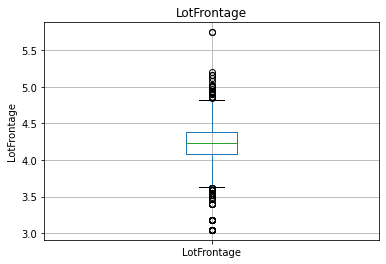

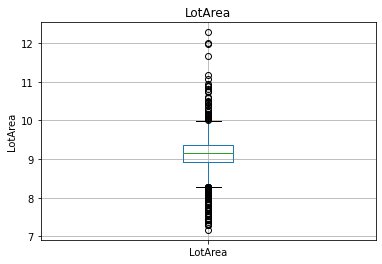

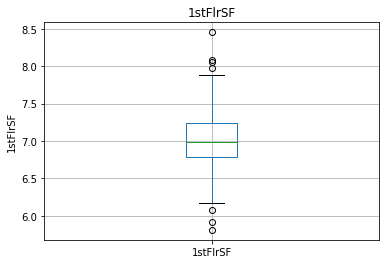

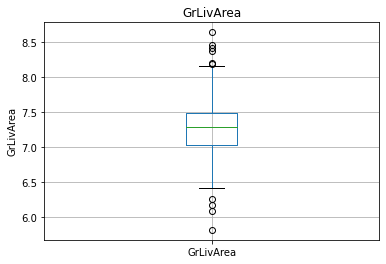

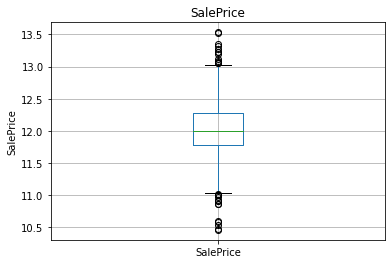

In [ ]:
# We will create a box plot to visualize the outliers in features

for feature in continuous_features:
  data=df_train.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature]) #Log transformation on all categorical features
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


## **Categorical Variables**

In [ ]:
#Make a seperate list for categorical features
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtype == 'O']

# print continuous features
print("Categorical feature count: {} \n".format(len(categorical_features)))

print('Continuous features are: ')
categorical_features


Categorical feature count: 43 

Continuous features are: 


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
df_train[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

### **Cardinality value** of Categorical feature
We will see how many distinct categories each of these categorical feature has. 

In [ ]:
for feature in categorical_features:
  print('Number of distinct categories in feature {} are {}'.format(feature, len(df_train[feature].unique())))

Number of distinct categories in feature MSZoning are 5
Number of distinct categories in feature Street are 2
Number of distinct categories in feature Alley are 3
Number of distinct categories in feature LotShape are 4
Number of distinct categories in feature LandContour are 4
Number of distinct categories in feature Utilities are 2
Number of distinct categories in feature LotConfig are 5
Number of distinct categories in feature LandSlope are 3
Number of distinct categories in feature Neighborhood are 25
Number of distinct categories in feature Condition1 are 9
Number of distinct categories in feature Condition2 are 8
Number of distinct categories in feature BldgType are 5
Number of distinct categories in feature HouseStyle are 8
Number of distinct categories in feature RoofStyle are 6
Number of distinct categories in feature RoofMatl are 8
Number of distinct categories in feature Exterior1st are 15
Number of distinct categories in feature Exterior2nd are 16
Number of distinct categori

Based on the result above, some feature have large number of unique categories, such as:

* **Condition1** has 9 distinct categories
* **Neighborhood** has 25 distinct categories
* **Exterior1st** has 15 distinct categories
* **Exterior2nd** has 16 distinct categories
* **SaleType** has 9 distinct categories

In Feature engineering, we will use a different method for encoding these features, rest all can be encoded using One-Hot encoding.


### Relation between **Categorical feature** and **Dependent variable (Sale Price)**

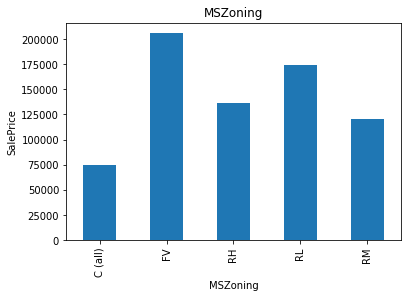

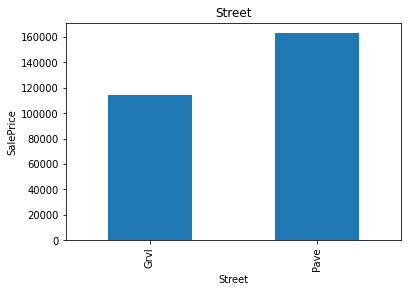

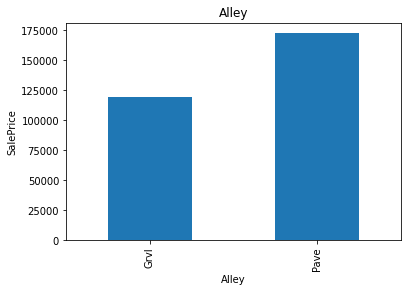

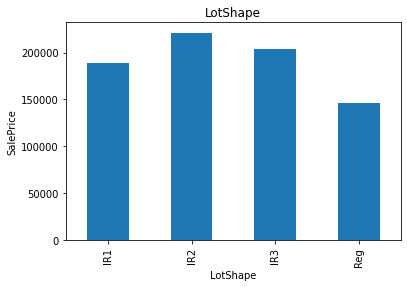

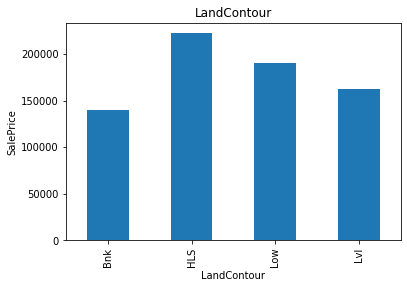

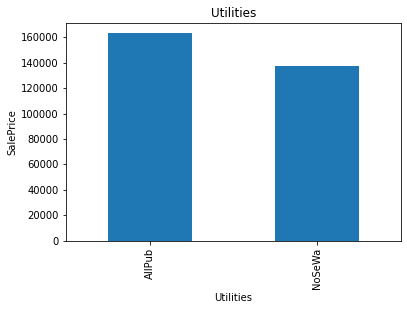

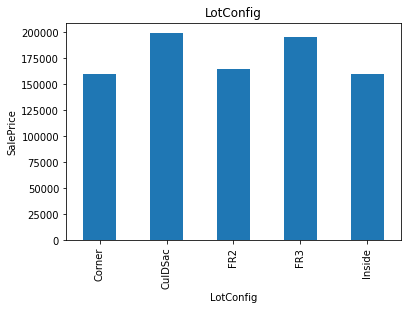

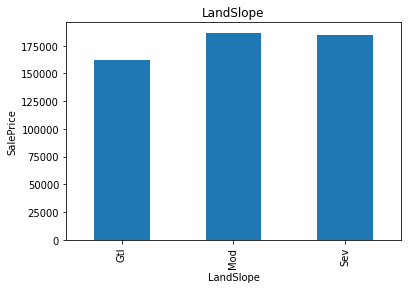

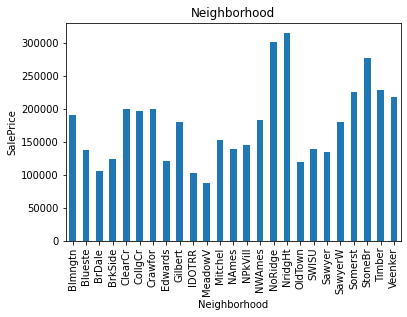

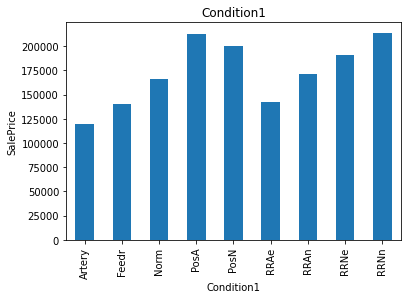

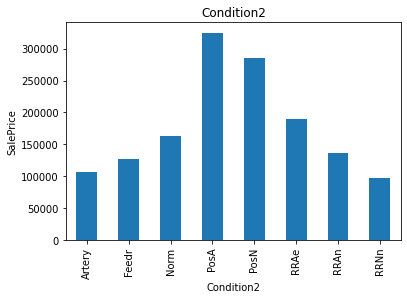

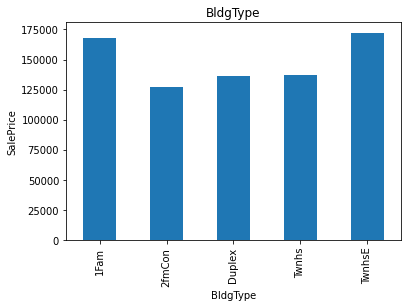

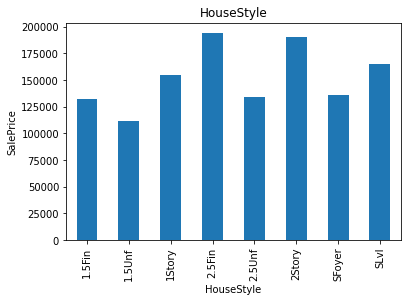

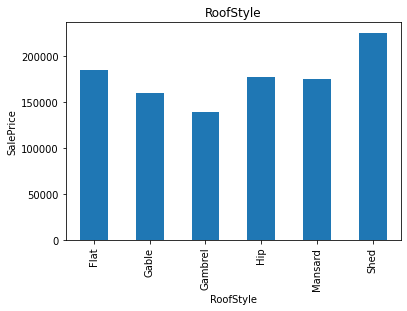

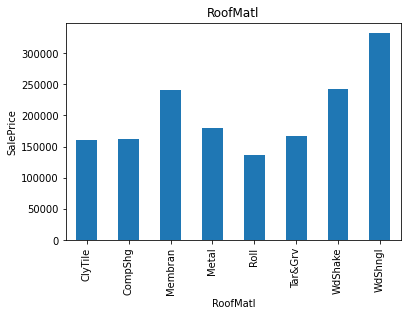

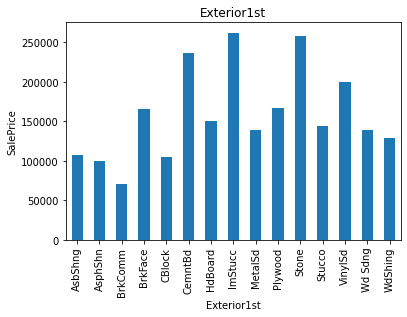

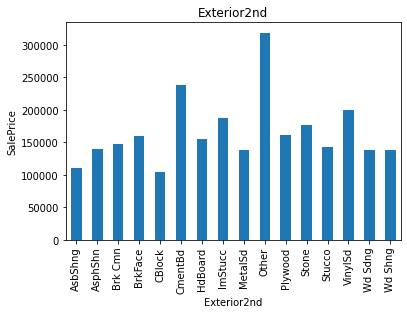

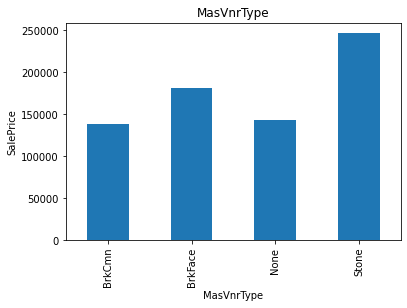

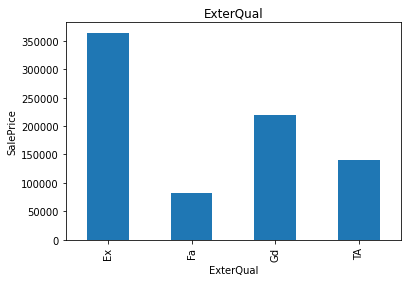

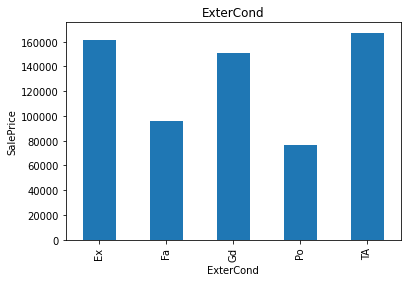

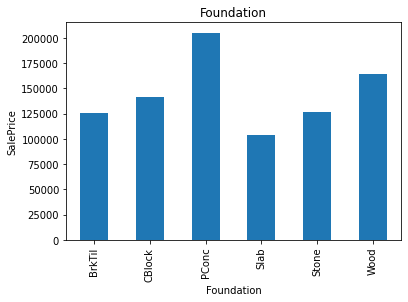

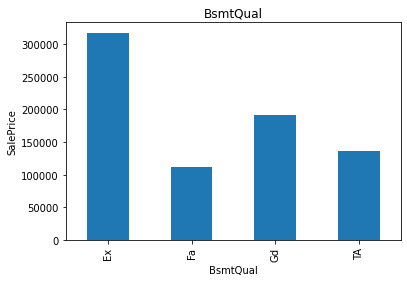

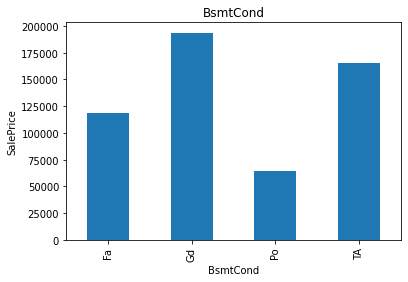

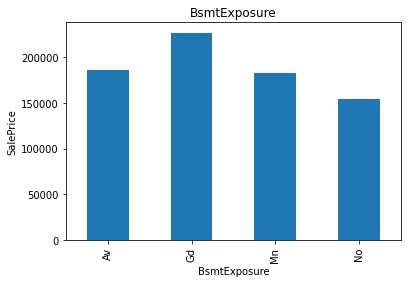

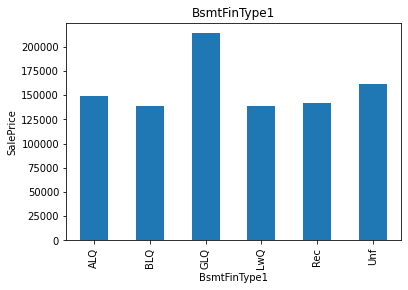

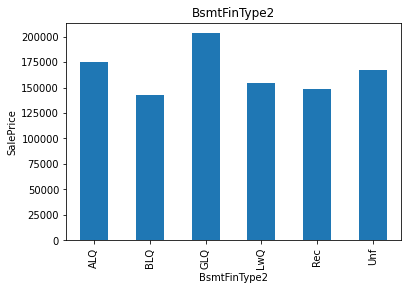

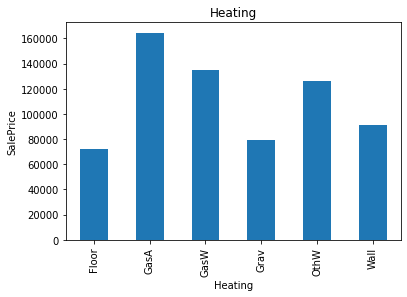

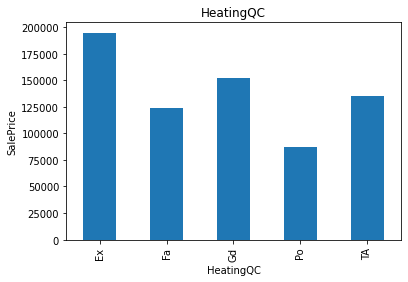

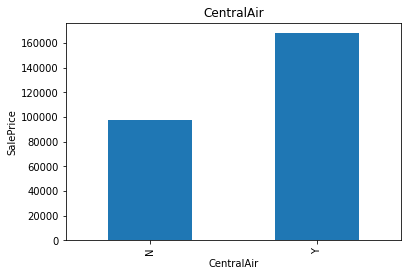

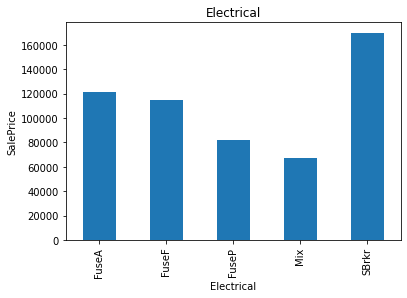

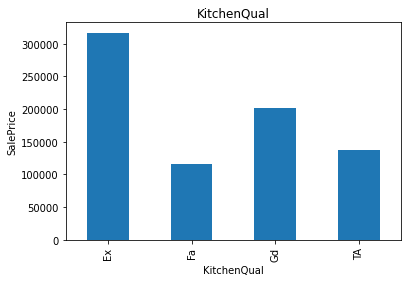

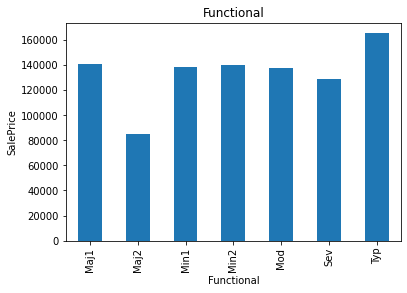

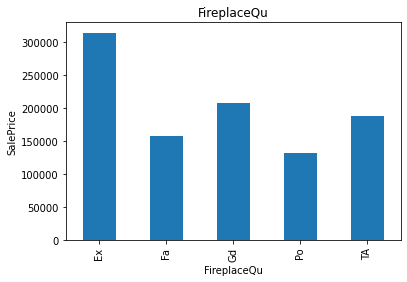

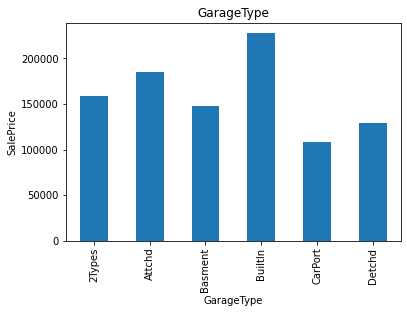

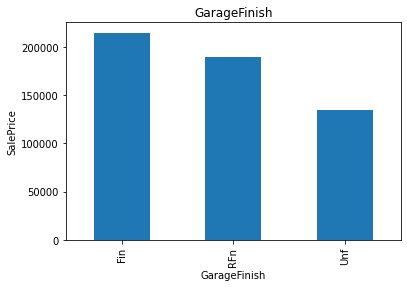

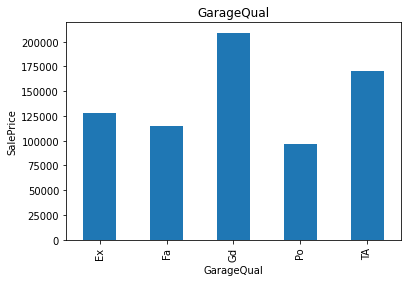

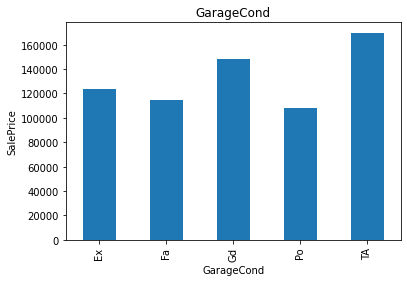

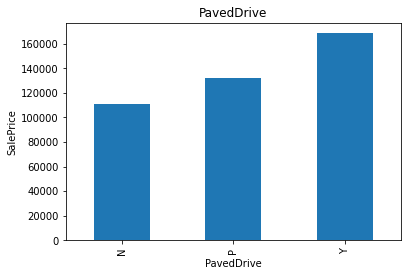

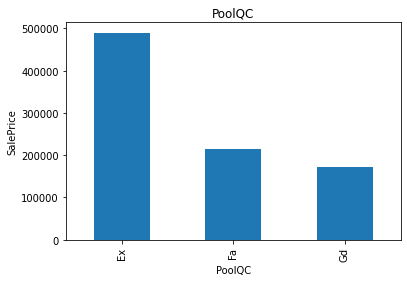

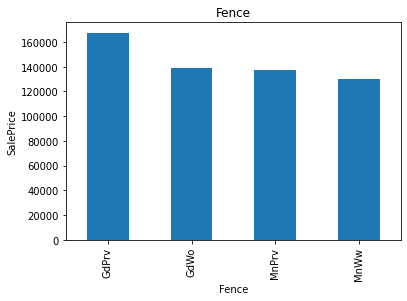

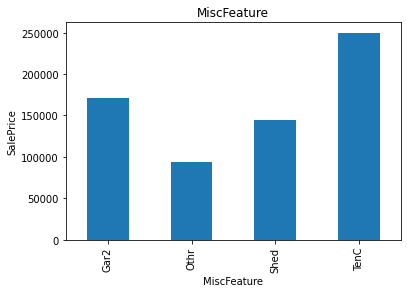

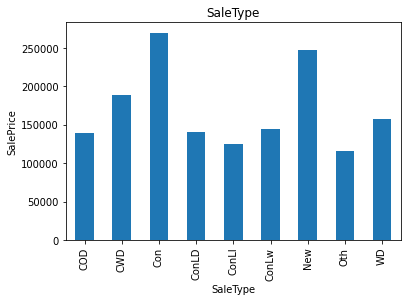

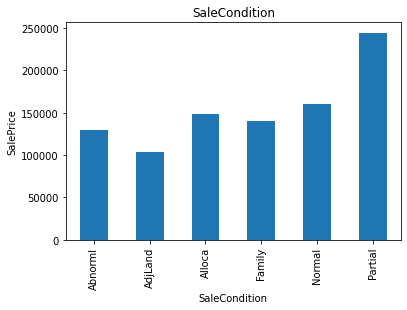

In [ ]:
for feature in categorical_features:
  data = df_train.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

# **Feature Engineering**

In this section, we will handle:
1. Dropping unneccessary feature
2. Missing Values
3. Temporal Variables
4. Categorical features
5. Standardization of values




### **Data Leakage**
For kaggle competetions we combine the test data and train data and perform feature engineering on combined data.
Later we split the test and train data, sometimes during this process, some test data goes in train data and vice-versa which is called **Data Leakage**.
In this dataset, I will perform feature engineering seperately on test and train data to avoid any Data Leakage and reduce the overfitting of model.

## **Dropping unnecessary feature**


*   ID of homes



In [ ]:
# df_train.drop(columns=['Id'], inplace=True)

## **Missing values**

### Handling missing/Nan values in **Categorical features** 


### Finding **Categorical features** with missing values

In [ ]:
# Make a seperate list for all the categorical feature that have missing values and percentage of missing values
categorical_features_nan = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes == 'O']

#Print the percentage of missing values in categorical features
for feature in categorical_features_nan:
  print('{}: {}% of missing values'.format(feature, np.round(df_train[feature].isnull().mean(),4)))


Alley: 0.9377% of missing values
MasVnrType: 0.0055% of missing values
BsmtQual: 0.0253% of missing values
BsmtCond: 0.0253% of missing values
BsmtExposure: 0.026% of missing values
BsmtFinType1: 0.0253% of missing values
BsmtFinType2: 0.026% of missing values
FireplaceQu: 0.4726% of missing values
GarageType: 0.0555% of missing values
GarageFinish: 0.0555% of missing values
GarageQual: 0.0555% of missing values
GarageCond: 0.0555% of missing values
PoolQC: 0.9952% of missing values
Fence: 0.8075% of missing values
MiscFeature: 0.963% of missing values


As evident some features have lot of missing values:
* **Alley**: 0.9377% of missing values
* **FireplaceQu**: 0.4726% of missing values
* **PoolQC**: 0.9952% of missing values
* **MiscFeature**: 0.963% of missing values




### Replacing missing/Nan values with a new label **"Missing"** for all categorical features

In [ ]:
##Replace all missing/Nan values with "Missing" label
def replace_cat_feature(df, categorical_features_nan):
  data = df.copy()
  data[categorical_features_nan] = data[categorical_features_nan].fillna('Missing')
  return data


In [ ]:
#Sending dataframe and list of features with missing/Nan values
df_train = replace_cat_feature(df_train,categorical_features_nan)

In [ ]:
#Check if any missing/Nan values left in the df_train
df_train[categorical_features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

### Handling missing/Nan values in **Numerical features** 


### Finding **Numerical features** with missing values

In [ ]:
# Make a seperate list for all the numerical feature that have missing values and percentage of missing values
numeric_features_nan = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes != 'O']

#Print the percentage of missing values in numerical features
for feature in numeric_features_nan:
  print('{}: {}% of missing values'.format(feature, np.round(df_train[feature].isnull().mean(),4)))

LotFrontage: 0.1774% of missing values
MasVnrArea: 0.0055% of missing values
GarageYrBlt: 0.0555% of missing values


In [ ]:
df_train.shape

(1460, 81)

### Replacing missing/Nan values with **median values** for all numerical features

* In EDA, we noticed a lot of outliers so we will go with median and not mean.
* In this process, we will also create an extra feature where we will map the missing value row with 1 and non-missing value  with 0.

In [ ]:
for feature in numeric_features_nan:
  
  # Calculate the median value for the feature
  median_value = df_train[feature].median()

  # Create a new feature to map missing value row as 1 and non-missing value as 0
  df_train[feature + 'nan'] = np.where(df_train[feature].isnull,1,0)

  # Replace all missing values in feature with Median value
  df_train[feature].fillna(median_value, inplace=True)

In [ ]:
df_train.shape

(1460, 84)

In [ ]:
#Checking the percentage of missing values in numerical features
for feature in numeric_features_nan:
  print('{}: {}% of missing values'.format(feature, np.round(df_train[feature].isnull().mean(),4)))

LotFrontage: 0.0% of missing values
MasVnrArea: 0.0% of missing values
GarageYrBlt: 0.0% of missing values


In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

## **Temporal variable (E.g. Datatime Variable)**

* In Feature Engineering part, we will replace the year value with number of year difference from Year sold of the house.

* We have all the year features in *year_features* list from EDA.

In [ ]:
for feature in year_features:
  if feature!= 'YrSold':

    #Calculate the difference of years between selected feature and the year house was sold
    df_train[feature]=df_train['YrSold'] - df_train[feature]

# Dropping Year sold feature
df_train.drop(columns=['YrSold'], inplace=True)

In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

## **Transformations on skewed numerical data**

* In Feature Engineering part, we will apply logarithmic transformation on skewed numerical data

* We can only consider **continuous numerical features** for this.
* We have to check that selected features **do not have 0** as a value in them before applying Logarithmic transformation.


In [ ]:
# Create a seperate list for num_features from continuous_features made in EDA
num_features = [feature for feature in continuous_features if 0 not in df_train[feature].unique()]

print('num_features are: ')
num_features


num_features are: 


['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [ ]:
#Applying Logarithmic transformation on num_features
for feature in num_features:
  df_train[feature] = np.log(df_train[feature])

In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

## Handling **Rare Categorical features**

* We will calculate %tage of distinct categories present in each categorical feature.
* If this %tage is less than 1%, we will replace it with a new label.
* This way we will reduce the number of less frequest categories in the dataset

In [ ]:
print('Continuous features are: ')
categorical_features

Continuous features are: 


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
for feature in categorical_features:
  
  #Calculate the %tage of multiple categories in that feature compared to all categories in the dataset
  temp = df_train.groupby(feature)['Id'].count()/len(df_train)
  
  #finding the index number of categories more than 1% of all categories in the dataset
  temp_df = temp[temp>0.01].index

  #Replacing rare categories with "Rare_var" in the entire dataset
  df_train[feature] = np.where(df_train[feature].isin(temp_df), df_train[feature], 'Rare_var')

In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl     Rare_var      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

# **Applying feature engineering to Test Data**

In [ ]:
print('Test data shape:{}'.format(df_test.shape))

Test data shape:(1459, 80)


In [ ]:
features_with_na=[features for features in df_test.columns if df_test[features].isnull().sum()>1]

numerical_features = [feature for feature in df_test.columns if df_test[feature].dtype != 'O']

year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

discrete_features = [feature for feature in numerical_features if len(df_test[feature].unique())<25 and feature not in year_features + ['Id']]

continuous_features = [feature for feature in numerical_features if feature not in discrete_features + year_features + ['Id']]

categorical_features = [feature for feature in df_test.columns if df_test[feature].dtype == 'O']

categorical_features_nan = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes == 'O']

numeric_features_nan = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes != 'O']

num_features = [feature for feature in continuous_features if 0 not in df_test[feature].unique()]


In [ ]:
#Replacing missing/nan values with "Missing"
df_test = replace_cat_feature(df_test,categorical_features_nan)

In [ ]:
feature_comparison(df_train, df_test)

Additional features in train data: ['SalePrice', 'LotFrontagenan', 'MasVnrAreanan', 'GarageYrBltnan']
Additional features in test data: ['YrSold']


['YrSold']

In [ ]:
for feature in numeric_features_nan:
  
  # Calculate the median value for the feature
  median_value = df_test[feature].median()

  # Create a new feature to map missing value row as 1 and non-missing value as 0
  df_test[feature + 'nan'] = np.where(df_test[feature].isnull,1,0)

  # Replace all missing values in feature with Median value
  df_test[feature].fillna(median_value, inplace=True)

In [ ]:
feature_comparison(df_train, df_test)

Additional features in train data: ['SalePrice']
Additional features in test data: ['YrSold', 'BsmtFullBathnan', 'BsmtHalfBathnan']


['YrSold', 'BsmtFullBathnan', 'BsmtHalfBathnan']

### **Observation**:


2 additional features have been created in Test dataset which are not present in Train dataset.

* BsmtFullBathnan
* BsmtHalfBathnan

This is because there were missing values in *BsmtFullBath* and *BsmtHalfBath* features in Test data but no missing values for these features in Train data.

**Solution**
We will deal with it later after feature selection procerss

We will create these two additional features in train data with observation 0 as there are no missing values.
This will increase the feature space by 2 which is not a big number.






In [ ]:
for feature in year_features:
  if feature!= 'YrSold':

    #Calculate the difference of years between selected feature and the year house was sold
    df_test[feature]=df_test['YrSold'] - df_test[feature]

# Dropping Year sold feature
df_test.drop(columns=['YrSold'], inplace=True)


In [ ]:
for feature in num_features:
  df_test[feature] = np.log(df_test[feature])

In [ ]:
for feature in categorical_features:
  
  #Calculate the %tage of multiple categories in that feature compared to all categories in the dataset
  temp = df_test.groupby(feature)['Id'].count()/len(df_test)
  
  #finding the index number of categories more than 1% of all categories in the dataset
  temp_df = temp[temp>0.01].index

  #Replacing rare categories with "Rare_var" in the entire dataset
  df_test[feature] = np.where(df_test[feature].isin(temp_df), df_test[feature], 'Rare_var')


### Difference in number of categories for multiple features in Training and Testing datasets

In [ ]:
def cats_comparison(df_train, df_test):
  for feature in categorical_features:
    category_difference = (len(df_test[feature].unique()) - len(df_train[feature].unique()))
    if category_difference <= 0:
      pass
    else:
      non_zero_cat_diff = category_difference
      print('Additional distinct categories in Test dataset: {} - {}'.format(feature, non_zero_cat_diff))
  return

In [ ]:
cats_comparison(df_train, df_test)

Additional distinct categories in Test dataset: Condition1 - 1
Additional distinct categories in Test dataset: Exterior2nd - 1
Additional distinct categories in Test dataset: KitchenQual - 1
Additional distinct categories in Test dataset: GarageType - 1
Additional distinct categories in Test dataset: SaleType - 1


In [ ]:
len(df_test['KitchenQual'].unique())

5

### **Observation**:
As we can see, Test data has many additional categories in categorical features in comparison to Train data.
This will be a problem during Encoding categorical features as we are using Mean Encoding.
We are obtaining labels from Train data and mapping them over Test data so additional categories will have no labels available for them.

**Solution**
We will calculate frequency of these additional categories and if the frequency is not high, we will replace them with Rare_val

In [ ]:
# for feature in categorical_features:
#   cat_df_test = len(df_test[feature].unique())
#   cat_df_train = len(df_train[feature].unique())
#   if (cat_df_test > cat_df_train):
#     for i in range(cat_df_train):
#       if df_test[feature].unique()[i] not in df_train[feature].unique():
#         df_train = df_train.append({feature:df_test[feature].unique()[i]}, ignore_index=True)

# df_train.fillna(0)

# Encoding **Categorical features** with Mean Encoding

[Read more....](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)

In [ ]:
for feature in categorical_features:
    mean_encode = df_train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(mean_encode,0)}
    df_train[feature]=df_train[feature].map(labels_ordered)
    df_test[feature]=df_test[feature].map(labels_ordered)

# **Feature Scaling**

* We will make a seperate list of features we want to apply scaling too (exlude dependent feature i.e. Sale Price)
* Apply Normalization to bring the data value between 0 and 1 using *MinMax Scaler* library

In [ ]:
feature_scale = [feature for feature in df_train.columns if feature not in ['SalePrice']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

final_df_train = pd.concat([df_train[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.fit_transform(df_train[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
final_df_test = pd.DataFrame(scaler.fit_transform(df_test[feature_scale]), columns=feature_scale)

In [ ]:
New_feat_in_Test = feature_comparison(df_train, df_test)

Additional features in train data: ['SalePrice']
Additional features in test data: ['BsmtFullBathnan', 'BsmtHalfBathnan']


In [ ]:
scaler_test = MinMaxScaler()
df_test_new_feat = pd.DataFrame(scaler_test.fit_transform(df_test[New_feat_in_Test]), columns=New_feat_in_Test)

In [ ]:
final_df_test = pd.concat([final_df_test, df_test_new_feat], axis=1)

# **Saving the final train data to csv**

In [ ]:
path_to_csv_folder = '/content/drive/MyDrive/Colab Notebooks/Explotatory Data Analysis/Advance House pricing prediction/Data'
final_df_train.to_csv(path_to_csv_folder + '/final_train.csv', index=False)
final_df_test.to_csv(path_to_csv_folder + '/final_test.csv', index=False)

# **Feature Selection**

We will use **Lasso Regression** and **SelectFromModel** to select relevent features.

## Load **Final Train Data** from csv

In [6]:
path_to_csv_folder = '/content/drive/MyDrive/Colab Notebooks/Explotatory Data Analysis/Advance House pricing prediction/Data'
df_train = pd.read_csv(path_to_csv_folder + '/final_train.csv')

In [7]:
df_train.head()

SalePrice        Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0  12.247694  0.000000    0.235294      0.75     0.418208  0.366344     1.0   
1  12.109011  0.000685    0.000000      0.75     0.495064  0.391317     1.0   
2  12.317167  0.001371    0.235294      0.75     0.434909  0.422359     1.0   
3  11.849398  0.002056    0.294118      0.75     0.388581  0.390295     1.0   
4  12.429216  0.002742    0.235294      0.75     0.513123  0.468761     1.0   

   Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0    1.0  0.000000     0.333333        1.0       0.00        0.0   
1    1.0  0.000000     0.333333        1.0       0.50        0.0   
2    1.0  0.333333     0.333333        1.0       0.00        0.0   
3    1.0  0.333333     0.333333        1.0       0.25        0.0   
4    1.0  0.333333     0.333333        1.0       0.50        0.0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0      0.636364         0.4         1.0      0.75         1.0     0.666667   
1      0.500000         0.2         1.0      0.75         0.6     0.555556   
2      0.636364         0.4         1.0      0.75         1.0     0.666667   
3      0.727273         0.4         1.0      0.75         1.0     0.666667   
4      1.000000         0.4         1.0      0.75         1.0     0.777778   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0        0.500   0.036765      0.098361        0.0       0.0          1.0   
1        0.875   0.227941      0.524590        0.0       0.0          0.4   
2        0.500   0.051471      0.114754        0.0       0.0          1.0   
3        0.500   0.669118      0.606557        0.0       0.0          0.2   
4        0.500   0.058824      0.147541        0.0       0.0          1.0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0          1.0        0.50     0.12250   0.666667        1.0        1.00   
1          0.3        0.25     0.00000   0.333333        1.0        0.50   
2          1.0        0.50     0.10125   0.666667        1.0        1.00   
3          0.4        0.25     0.00000   0.333333        1.0        0.25   
4          1.0        0.50     0.21875   0.666667        1.0        1.00   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0      0.75      0.75          0.25      1.000000    0.125089      0.833333   
1      0.75      0.75          1.00      0.666667    0.173281      0.833333   
2      0.75      0.75          0.50      1.000000    0.086109      0.833333   
3      0.50      1.00          0.25      0.666667    0.038271      0.833333   
4      0.75      0.75          0.75      1.000000    0.116052      0.833333   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0         0.0   0.064212     0.140098      1.0       1.00         1.0   
1         0.0   0.121575     0.206547      1.0       1.00         1.0   
2         0.0   0.185788     0.150573      1.0       1.00         1.0   
3         0.0   0.231164     0.123732      1.0       0.75         1.0   
4         0.0   0.209760     0.187398      1.0       1.00         1.0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         1.0  0.356155  0.413559           0.0   0.577712      0.333333   
1         1.0  0.503056  0.000000           0.0   0.470245      0.000000   
2         1.0  0.383441  0.419370           0.0   0.593095      0.333333   
3         1.0  0.399941  0.366102           0.0   0.579157      0.333333   
4         1.0  0.466237  0.509927           0.0   0.666523      0.333333   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0  0.666667       0.5         0.375      0.333333     0.666667   
1           0.5  0.666667       0.0         0.375      0.333333     0.333333   
2           0.0  0.666667       0.5         0.375      0.333333     0.666667   
3           0.0  0.333333       0.0    

## Capture dependent and independent feature

In [8]:
#The dependent feature
y_train = df_train[['SalePrice']]

In [9]:
#The independent feature
X_train = df_train.drop(['SalePrice', 'Id'], axis=1)

## Applying SelectFrom and Lasso Regression for feature selection

[Read more...](https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499)

In [10]:
# Specify the Lasso Regression model and select a suitable alpha value
# The bigger the alpha, lesser number of features will be selected

# SelectFromModel will select features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) #set the seed value and use it in test data run
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [11]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])



*   **True** indicates the features is important and should be used
*   **False** indicates the features is not important and can be skipped (whose weights were shrinked to zero and are not important according to Lasso)  



## **Selected** features and **Dropped** features

In [12]:
# make a seperate list for selected features
selected_features = X_train.columns[(feature_sel_model.get_support())]

# make a seperate list for dropped features
dropped_features = X_train.columns[(feature_sel_model.estimator_.coef_ == 0).ravel().tolist()]

# print number of selected features and dropped features
print('total features: {}'.format((X_train.shape[1])))
print('total selected features: {}'.format(len(selected_features)))
print('total dropped features: {}'.format(len(dropped_features)))

total features: 81
total selected features: 21
total dropped features: 60


In [13]:
print(selected_features)

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')


In [14]:
print(dropped_features)

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Functional', 'GarageYrBlt', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'SaleType', 'LotFrontagenan', 'MasVnrAreanan',
       'GarageYrBltnan'],
      dtype='object')


### New Training dataset

In [15]:
# Remove all dropped features from training dataset and stopre only selected features
X_train = X_train[selected_features]

In [16]:
X_train.shape

(1460, 21)

### Correlation values on new training dataset

In [17]:
X_train.corr()

MSSubClass  MSZoning  Neighborhood  OverallQual  YearRemodAdd  \
MSSubClass       1.000000 -0.211535     -0.024106     0.032628     -0.041968   
MSZoning        -0.211535  1.000000      0.553530     0.269302     -0.240519   
Neighborhood    -0.024106  0.553530      1.000000     0.672442     -0.524562   
OverallQual      0.032628  0.269302      0.672442     1.000000     -0.552570   
YearRemodAdd    -0.041968 -0.240519     -0.524562    -0.552570      1.000000   
RoofStyle       -0.135084  0.054911      0.115438     0.172857     -0.024536   
BsmtQual         0.060184  0.243081      0.607629     0.660767     -0.548990   
BsmtExposure     0.051150  0.086154      0.273926     0.296517     -0.225577   
HeatingQC       -0.019458  0.199776      0.425708     0.457083     -0.550765   
CentralAir      -0.101774  0.254369      0.266575     0.272038     -0.299553   
1stFlrSF        -0.288607  0.270233      0.407366     0.456036     -0.235014   
GrLivArea        0.081717  0.192957      0.451060     0.614210     -0.313528   
BsmtFullBath     0.003491  0.120119      0.138124     0.111098     -0.115183   
KitchenQual     -0.012383  0.247010      0.568422     0.673331     -0.625328   
Fireplaces      -0.045569  0.170517      0.317493     0.396765     -0.114158   
FireplaceQu     -0.039267  0.169354      0.397768     0.500749     -0.206572   
GarageType      -0.108335  0.342100      0.501436     0.495281     -0.359943   
GarageFinish    -0.033077  0.285038      0.535214     0.556863     -0.444549   
GarageCars      -0.040110  0.253433      0.573602     0.600671     -0.423236   
PavedDrive      -0.059925  0.289688      0.295461     0.229393     -0.168074   
SaleCondition   -0.029423  0.124343      0.209018     0.214590     -0.241391   

               RoofStyle  BsmtQual  BsmtExposure  HeatingQC  CentralAir  \
MSSubClass     -0.135084  0.060184      0.051150  -0.019458   -0.101774   
MSZoning        0.054911  0.243081      0.086154   0.199776    0.254369   
Neighborhood    0.115438  0.607629      0.273926   0.425708    0.266575   
OverallQual     0.172857  0.660767      0.296517   0.457083    0.272038   
YearRemodAdd   -0.024536 -0.548990     -0.225577  -0.550765   -0.299553   
RoofStyle       1.000000  0.073212      0.072342   0.021651    0.015223   
BsmtQual        0.073212  1.000000      0.396620   0.417721    0.268529   
BsmtExposure    0.072342  0.396620      1.000000   0.150852    0.129770   
HeatingQC       0.021651  0.417721      0.150852   1.000000    0.306294   
CentralAir      0.015223  0.268529      0.129770   0.306294    1.000000   
1stFlrSF        0.301455  0.308892      0.287519   0.198148    0.172061   
GrLivArea       0.135633  0.366459      0.113022   0.272837    0.129786   
BsmtFullBath    0.105542  0.223106      0.338672   0.083735    0.114603   
KitchenQual     0.097786  0.545691      0.254707   0.504228    0.257830   
Fireplaces      0.142942  0.239269      0.186291   0.129689    0.186309   
FireplaceQu     0.163129  0.330247      0.166354   0.219840    0.175590   
GarageType      0.106319  0.429149      0.213335   0.300065    0.356785   
GarageFinish    0.132926  0.515933      0.251367   0.392244    0.283124   
GarageCars      0.135697  0.486005      0.252830   0.325347    0.233726   
PavedDrive      0.020822  0.260308      0.115508   0.157502    0.337516   
SaleCondition   0.054253  0.213296      0.083471   0.186986    0.074311   

               1stFlrSF  GrLivArea  BsmtFullBath  KitchenQual  Fireplaces  \
MSSubClass    -0.288607   0.081717      0.003491    -0.012383   -0.045569   
MSZoning       0.270233   0.192957      0.120119     0.247010    0.170517   
Neighborhood   0.407366   0.451060      0.138124     0.568422    0.317493   
OverallQual    0.456036   0.614210      0.111098     0.673331    0.396765   
YearRemodAdd  -0.235014  -0.313528     -0.115183    -0.625328   -0.114158   
RoofStyle      0.301455   0.135633      0.105542     0.097786    0.142942   
BsmtQual       0.308892   0.366459      0.223106     0.545691   

### Correlation using Pearson Correlation

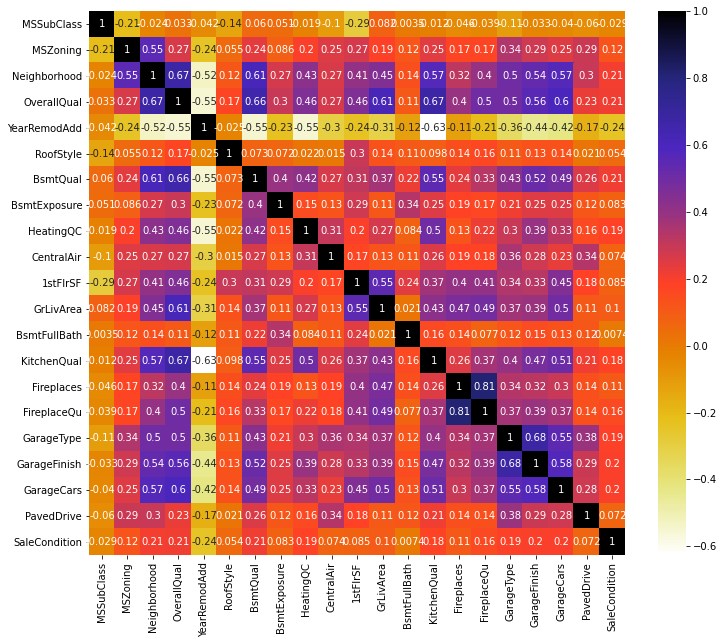

In [18]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
path_to_csv_folder = '/content/drive/MyDrive/Colab Notebooks/Explotatory Data Analysis/Advance House pricing prediction/Data'
df_test = pd.read_csv(path_to_csv_folder + '/final_test.csv')

In [20]:
X_test = df_test[selected_features]

# **Prediction and Agorithm selection**

In [21]:
print("Shape of X_Train dataset: {}".format(X_train.shape))
print("Shape of y_train dataset: {}".format(y_train.shape))
print("Shape of X_Test dataset: {}".format(X_test.shape))

Shape of X_Train dataset: (1460, 21)
Shape of y_train dataset: (1460, 1)
Shape of X_Test dataset: (1459, 21)


### **Visualizing data using sns pair plot**

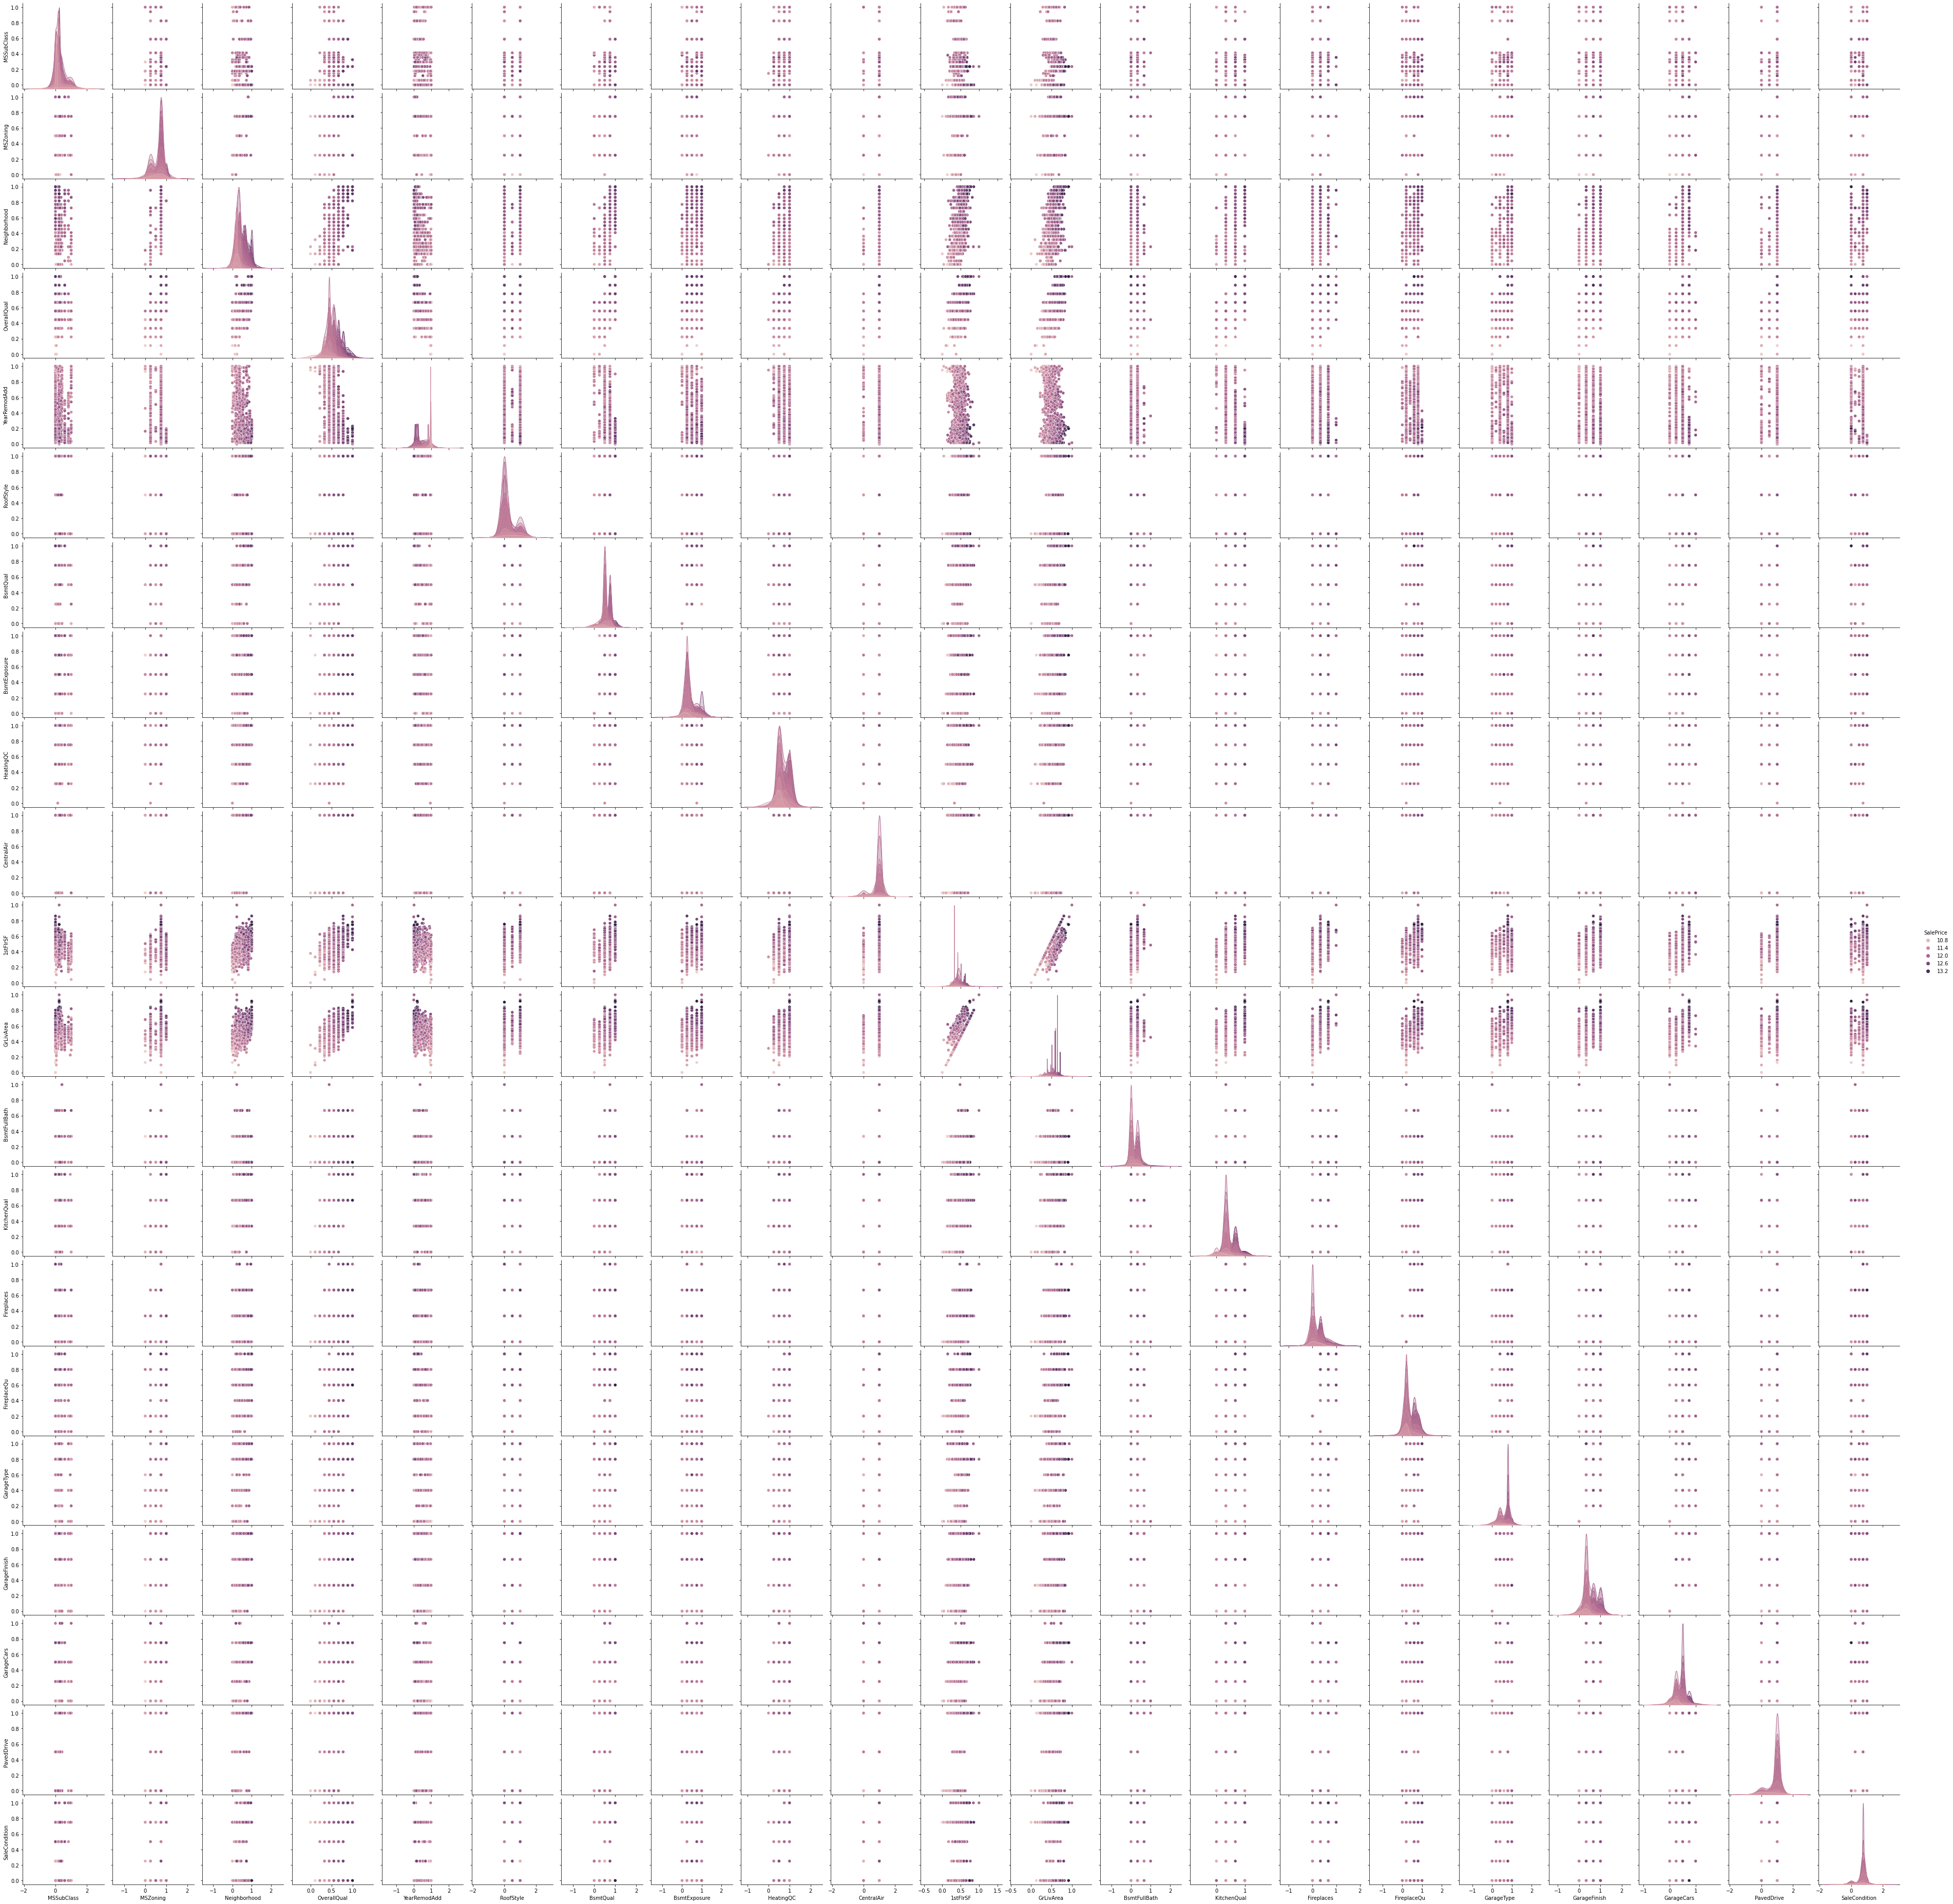

In [38]:
sns.pairplot(df_train,hue='SalePrice')

In [22]:
import warnings
warnings.filterwarnings('ignore')

# **Hyperparameter Tuning** with **Optuna**

[Read more...](https://towardsdatascience.com/exploring-optuna-a-hyper-parameter-framework-using-logistic-regression-84bd622cd3a5)

The main parameters used by a **Random Forest Classifier** are:

* criterion = the function used to evaluate the quality of a split.
* max_depth = maximum number of levels allowed in each tree.
* max_features = maximum number of features considered when splitting a node.
* min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
* min_samples_split = minimum number of samples necessary in a node to cause node splitting.
* n_estimators = number of trees in the ensamble.

In [25]:
import optuna
import sklearn
import pickle
from sklearn.ensemble import RandomForestRegressor

In [30]:
def objective(trial):
  
  rf_criterion = trial.suggest_categorical('rf_criterion', ['mse', 'mae']) 
  rf_n_estimators = trial.suggest_int('rf_n_estimators', 200, 2000, 10)
  rf_max_depth = int(trial.suggest_float('rf_max_depth', 10, 100, log=True))
  rf_min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 14)
  rf_min_samples_leaf = trial.suggest_int('rf_min_samples_leaf', 1, 14)
  rf_max_features = trial.suggest_categorical('rf_max_features', ['auto', 'sqrt','log2'])
  rf_max_samples = trial.suggest_uniform('rf_max_samples', 0.6, 0.99)
    
  regressor_obj = sklearn.ensemble.RandomForestRegressor(n_estimators=rf_n_estimators, 
                                               criterion=rf_criterion,
                                               max_depth=rf_max_depth, 
                                               min_samples_split=rf_min_samples_split, 
                                               min_samples_leaf=rf_min_samples_leaf, 
                                               max_features=rf_max_features, 
                                               max_samples=rf_max_samples, 
                                               bootstrap=True, 
                                               n_jobs=-1, 
                                               verbose=0)
  # Save a trained model to a file.
  with open(path_to_csv_folder+'/ML_trained_model/{}.pickle'.format(trial.number), 'wb') as fout:
    pickle.dump(regressor_obj, fout)

  return sklearn.model_selection.cross_val_score(regressor_obj, X_train, y_train, n_jobs=-1, cv=3).mean()

In [ ]:
optimizer_direction = 'maximize'

study = optuna.create_study(direction = optimizer_direction)
study.optimize(objective, n_trials=100)

# trial = study.best_trial

# print('Accuracy: {}'.format(trial.value))
# print("Best hyperparameters: {}".format(trial.params))


In [37]:
print("Best trial:")
trial = study.best_trial

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

print(study.best_trial.number)
# best_model = objective.best_booster

# new_preds = best_model.predict(X_test)



Best trial:
  Params: 
    rf_criterion: mse
    rf_n_estimators: 1790
    rf_max_depth: 21.839191115798222
    rf_min_samples_split: 3
    rf_min_samples_leaf: 1
    rf_max_features: log2
    rf_max_samples: 0.9332820372984728
85


In [33]:
# Load the best model.
with open(path_to_csv_folder+'/ML_trained_model/{}.pickle'.format(study.best_trial.number), "rb") as fin:
    best_clf = pickle.load(fin)

In [38]:
new_preds = best_clf.predict(X_test)

NotFittedError: ignored

In [65]:
# save results
df_results = study.trials_dataframe()
df_results.to_pickle(path_to_csv_folder + 'df_optuna_results.pkl')
df_results.to_csv(path_to_csv_folder + 'df_optuna_results.csv')

In [1]:
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

NameError: ignored

In [ ]:
import xgboost 
regressor=xgboost.XGBRegressor()

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   53.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.1min finished


[10:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [ ]:
import pickle
path_to_csv_folder = '/content/drive/MyDrive/Colab Notebooks/Explotatory Data Analysis/Advance House pricing prediction/Data/'
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(path_to_csv_folder + filename, 'wb'))

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
y_pred

array([11.411255, 11.827322, 12.046335, ..., 11.817409, 11.630298,
       12.218149], dtype=float32)

In [ ]:
##Create Sample Submission file 
pred=pd.DataFrame(y_pred)
path_to_csv_folder = '/content/drive/MyDrive/Colab Notebooks/Explotatory Data Analysis/Advance House pricing prediction/Data/'
sub_df=pd.read_csv(path_to_csv_folder + 'sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv(path_to_csv_folder + 'sample_submission.csv',index=False)